<h1><center>Bike Sharing - BoomBike</center></h1>

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [223]:
pd.set_option('display.max_columns', None)

In [224]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [225]:
df.shape

(730, 16)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null values

In [227]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping Instant because it's a redundant information, which is not required

### Dropping dteday since month and weekdays is present

In [228]:
#Dropping instant and dteday
df=df.drop(['instant','dteday'],axis=1)

In [229]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Mapping the categorical variables for clear understanding and categorizing to handle the data more easily

In [230]:
# mapping categorical variables 
df['weekday']=df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth']=df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df['weathersit']=df['weathersit'].map({1:'clear', 2:'mist',3:'drizzle'})

In [231]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


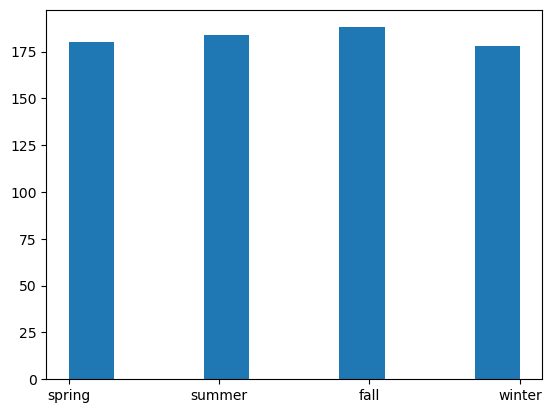

In [232]:
plt.hist(df.season)
plt.show()

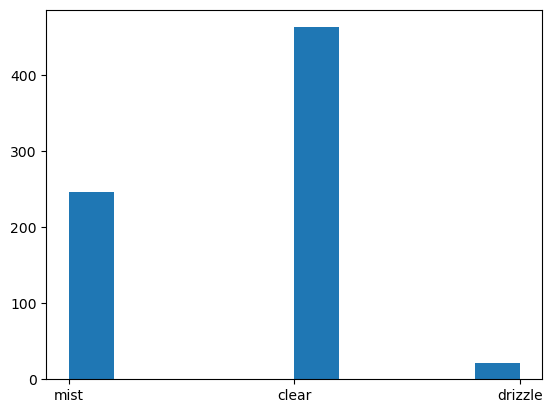

In [233]:
plt.hist(df.weathersit)
plt.show()

#### Above plot shows the weather is mostly clear and misty throughout the year

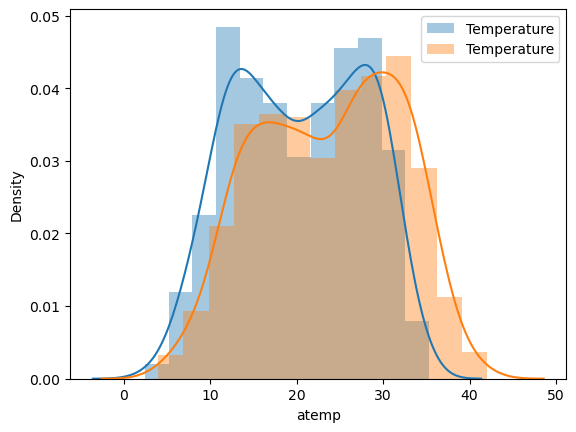

In [234]:
sns.distplot(df.temp, kde=True, label='Temperature')
sns.distplot(df.atemp, kde=True, label='Temperature')
plt.legend()
plt.show()

#### Deviation observed between actual and feels like temperature which is due to windspeed and humidity

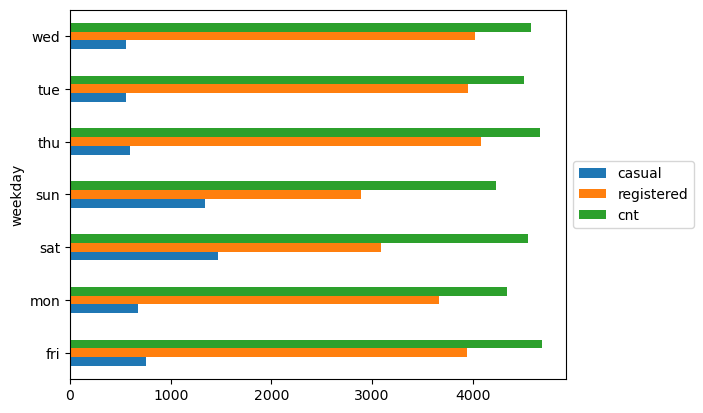

In [235]:
df.groupby('weekday')[['casual', 'registered', 'cnt']].mean().plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Compared to higher registered rides on weekdays and working days, casual rides are more common on weekends and vacations.
#### More registered users commute to work by bike throughout the weekdays.
#### On weekends Casual rides increase as people are using bikeshare for fun activities

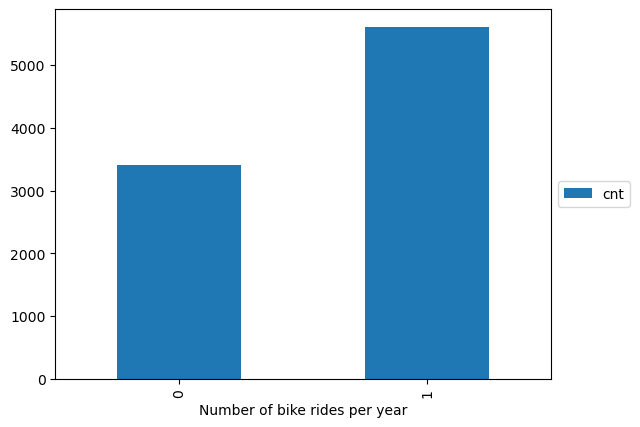

In [236]:
df.groupby('yr')['cnt'].mean().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of bike rides per year')
plt.show()

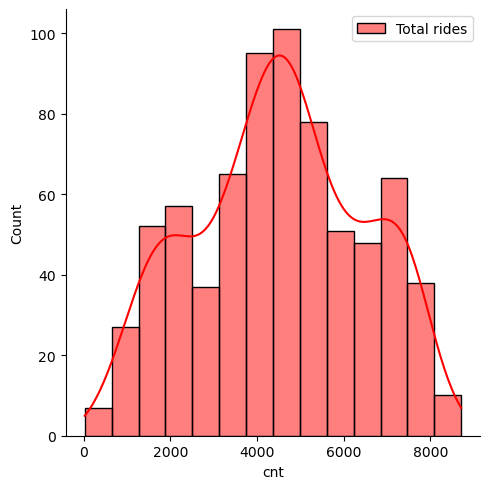

In [237]:
sns.displot(df.cnt, kde=True, label='Total rides',color="red")
plt.legend()
plt.show()

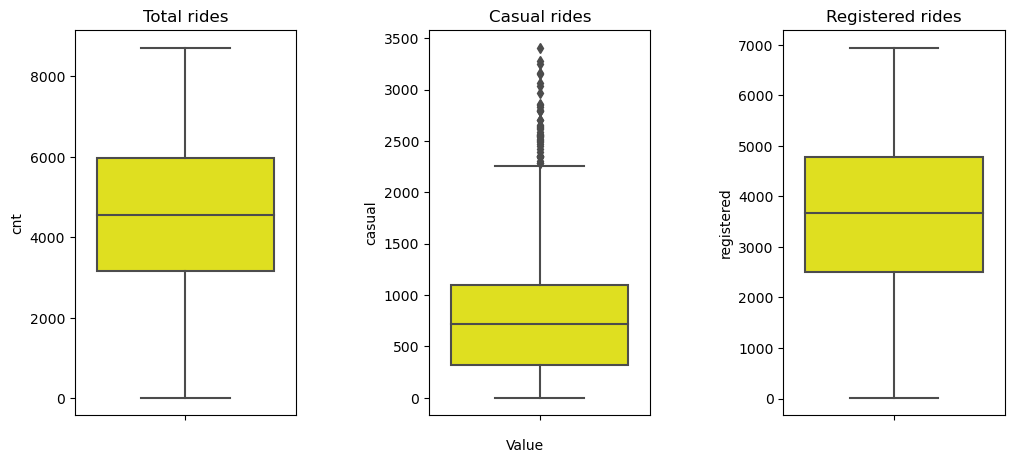

In [238]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Swap x and y axes
sns.boxplot(y=df.cnt, ax=axes[0],color="yellow")
axes[0].set_title('Total rides')

sns.boxplot(y=df.casual, ax=axes[1],color="yellow")
axes[1].set_title('Casual rides')

sns.boxplot(y=df.registered, ax=axes[2],color="yellow")
axes[2].set_title('Registered rides')

# Set common xlabel for all subplots
fig.text(0.5, 0.04, 'Value', ha='center')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Display the boxplots
plt.show()

#### The bike ride numbers almost follow normal distribution with median at around 4800

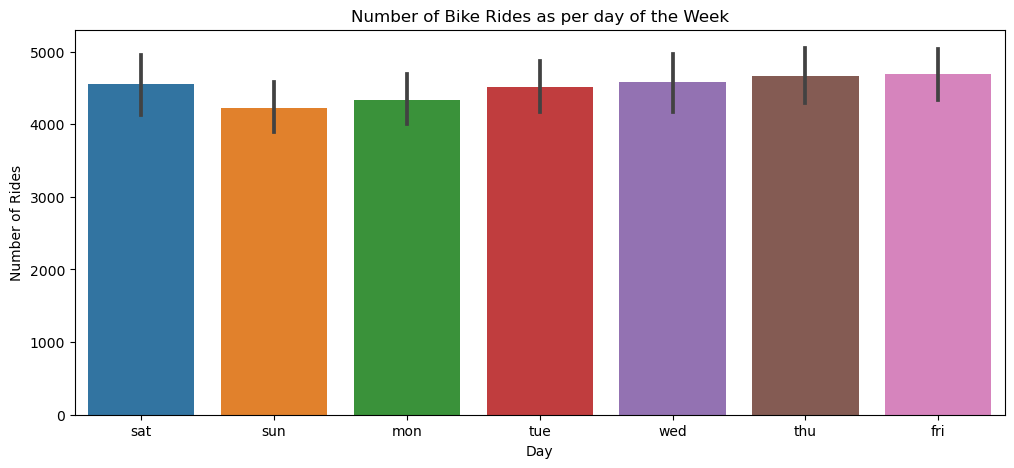

In [239]:
plt.figure(figsize=(12, 5))
sns.barplot(x='weekday', y=df.cnt, data=df,orient="v")
plt.title('Number of Bike Rides as per day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

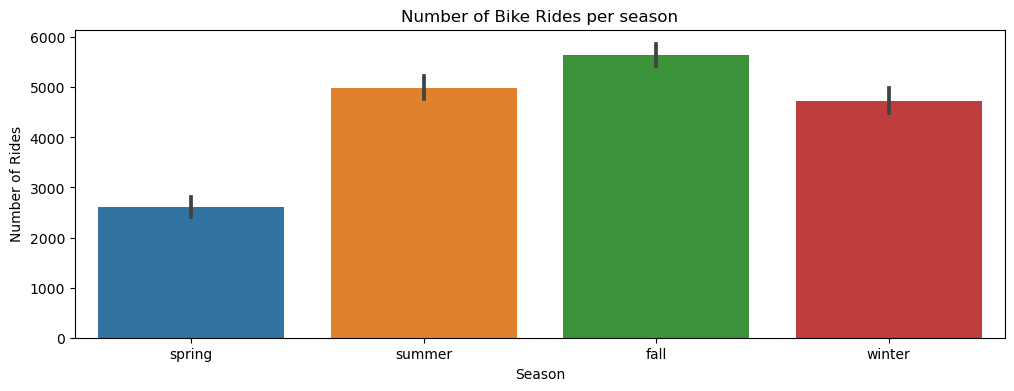

In [240]:
plt.figure(figsize=(12, 4))
sns.barplot(x='season', y='cnt', data=df)
plt.title('Number of Bike Rides per season')
plt.xlabel('Season')
plt.ylabel('Number of Rides')
plt.show()

#### Most rides are seen during Fall, followed by Summer and winter but least during Spring

In [241]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


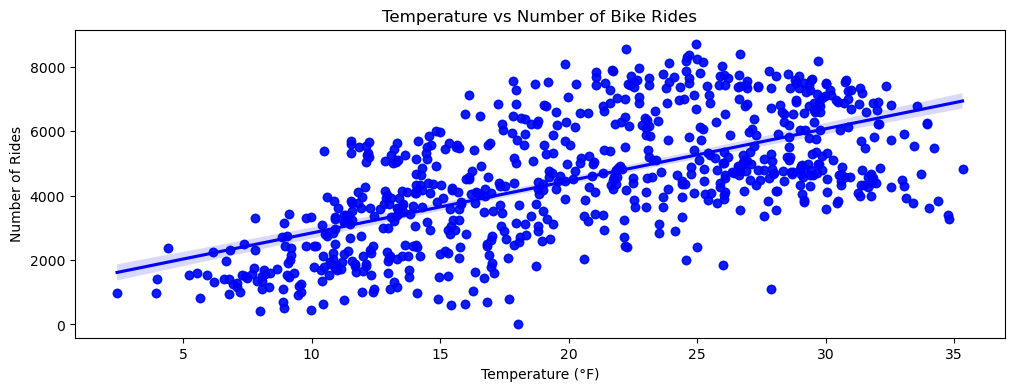

In [242]:
plt.figure(figsize=(12, 4))
plt.scatter(x='temp', y='cnt', data=df,alpha=0.8)
reg = sns.regplot(x='temp', y='cnt', data=df,color="blue")
plt.title('Temperature vs Number of Bike Rides')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Rides')
plt.show()

#### There is a clear positive correlation between temperature and bike rides

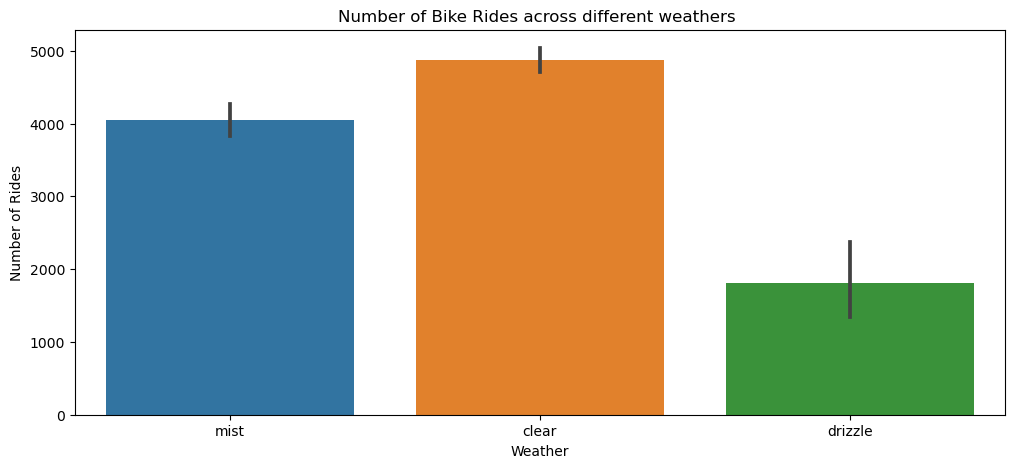

In [243]:
plt.figure(figsize=(12, 5))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Number of Bike Rides across different weathers ')
plt.xlabel('Weather')
plt.ylabel('Number of Rides')
plt.show()

#### There are lesser bike rides during light rainy weather

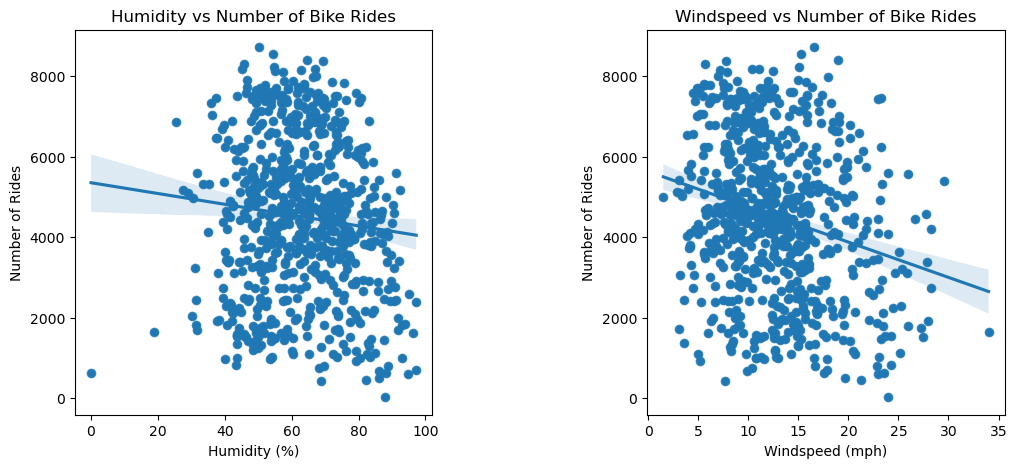

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create scatter plots of humidity, temperature, and windspeed against cnt
sns.scatterplot(x='hum', y='cnt', data=df, ax=axes[0])
sns.regplot(x='hum', y='cnt', data=df, ax=axes[0])
axes[0].set_title('Humidity vs Number of Bike Rides')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Number of Rides')



sns.scatterplot(x='windspeed', y='cnt', data=df, ax=axes[1])
sns.regplot(x='windspeed', y='cnt', data=df, ax=axes[1])
axes[1].set_title('Windspeed vs Number of Bike Rides')
axes[1].set_xlabel('Windspeed (mph)')
axes[1].set_ylabel('Number of Rides')


plt.subplots_adjust(wspace=0.6)
plt.show()

#### Seems there's no correlation between humidity and windspeed wrt Bike rides

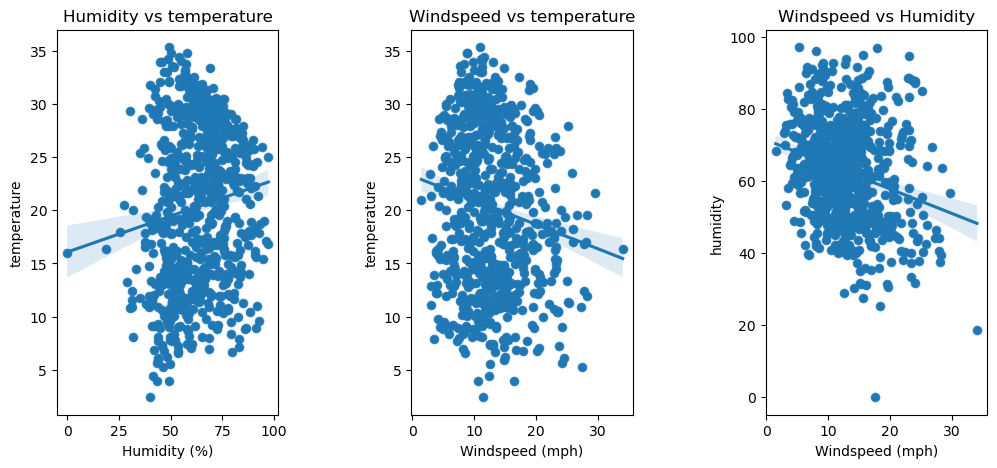

In [245]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Create scatter plots of humidity, temperature, and windspeed against cnt
sns.scatterplot(x='hum', y='temp', data=df, ax=axes[0])
sns.regplot(x='hum', y='temp', data=df, ax=axes[0])
axes[0].set_title('Humidity vs temperature')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('temperature')



sns.scatterplot(x='windspeed', y='temp', data=df, ax=axes[1])
sns.regplot(x='windspeed', y='temp', data=df, ax=axes[1])
axes[1].set_title('Windspeed vs temperature')
axes[1].set_xlabel('Windspeed (mph)')
axes[1].set_ylabel('temperature')


sns.scatterplot(x='windspeed', y='hum', data=df, ax=axes[2])
sns.regplot(x='windspeed', y='hum', data=df, ax=axes[2])
axes[2].set_title('Windspeed vs Humidity')
axes[2].set_xlabel('Windspeed (mph)')
axes[2].set_ylabel('humidity')


plt.subplots_adjust(wspace=0.6)
plt.show()

<Figure size 1600x3200 with 0 Axes>

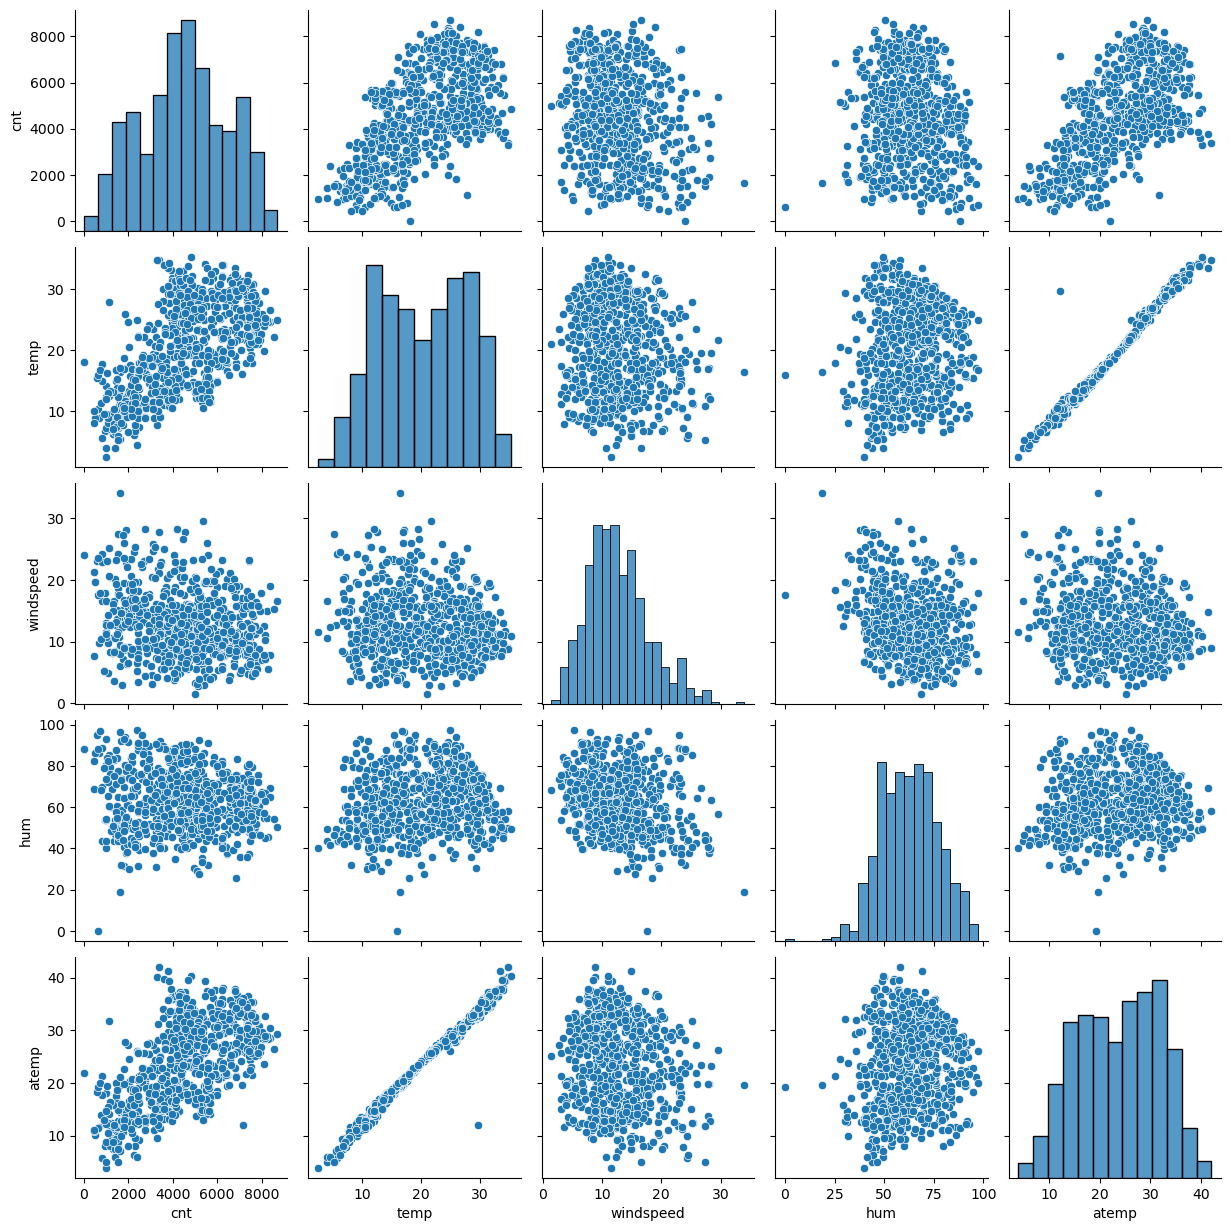

In [246]:
plt.figure(figsize = (16,32))
sns.pairplot(data=df[['cnt','temp','windspeed','hum','atemp']])
plt.show()

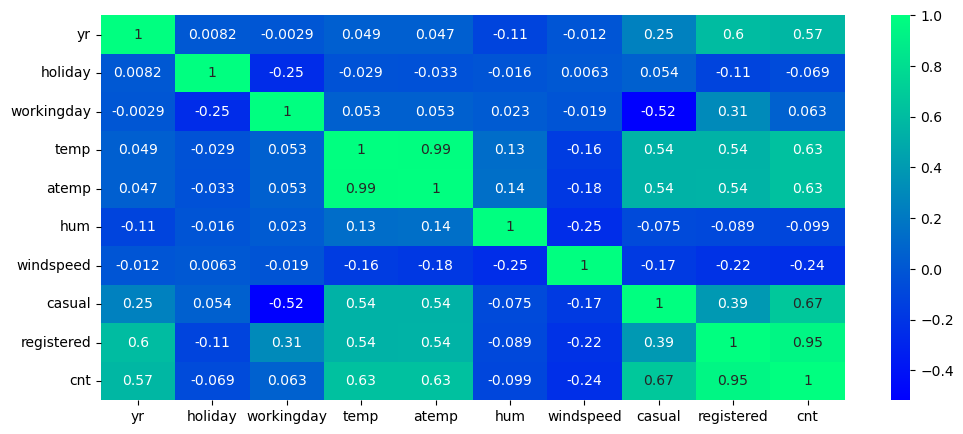

In [247]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='winter')
plt.show()

#### We see some clear correlation between the target and Predictors variables.

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## Creating dummy for categorical variables

In [249]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)

In [250]:
df = pd.get_dummies(data=df,columns=["weathersit"])

In [251]:
df= df.drop(['casual','registered'], axis=1)

In [252]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [253]:
df.shape

(730, 31)

## Creating Train and Test datasets into 70% and 30% ratio

In [254]:
# Split into train and test 
df_train, df_test=train_test_split(df,train_size=0.7,random_state=3)

In [255]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [256]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
270,0,0,1,26.035000,28.75790,84.8750,9.958143,3907,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
121,0,0,1,22.515847,26.64165,73.0000,12.291418,4401,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
238,0,0,0,27.880000,31.77780,85.0000,25.166339,1115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
592,1,0,1,29.485847,32.73440,51.9167,9.500332,7605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
590,1,0,1,29.793347,33.83895,68.6667,11.333586,6784,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Scaling the train dataset to normalize the continuous variables

In [257]:
scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [258]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_drizzle,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.035294,0.666667,0.544442,0.511841,0.642048,0.344415,0.519372,0.252941,0.229412,0.268627,0.086275,0.088235,0.068627,0.096078,0.068627,0.086275,0.084314,0.078431,0.086275,0.103922,0.080392,0.149020,0.162745,0.135294,0.133333,0.139216,0.135294,0.643137,0.025490,0.331373
std,0.500352,0.184703,0.471867,0.231359,0.213488,0.145147,0.162247,0.226475,0.435124,0.420867,0.443681,0.281045,0.283915,0.253068,0.294988,0.253068,0.281045,0.278131,0.269113,0.281045,0.305458,0.272166,0.356457,0.369495,0.342373,0.340268,0.346511,0.342373,0.479544,0.157763,0.471169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344439,0.332644,0.536953,0.225964,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.538523,0.519376,0.638175,0.317308,0.525023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746847,0.686225,0.746572,0.433925,0.691584,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating reusable functions for calculation OLS and VIF

In [259]:
#VIF function
def GetVif(train_data):
    vif=pd.DataFrame()
    vif['features']=train_data.columns
    vif['VIF']= [variance_inflation_factor(train_data.values,i)for i in range(train_data.shape[1])]
    vif['VIF']= round(vif.VIF,2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return vif

In [260]:
#OLS function
def LinRegModel(xTrainData,yTrainData):
    X_train_sm=sm.add_constant(xTrainData)
    lr=sm.OLS(yTrainData,X_train_sm)
    lr_model=lr.fit()
    return lr_model.summary()

### Splitting Train dataset into Target and Predictor | X_train and y_train

In [261]:
#Create X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [262]:
y_train.shape

(510,)

### Using RFE to check on the features significance and colinearity

In [263]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [264]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', False, 3),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 15),
 ('weathersit_clear', True, 1),
 ('weathersit_drizzle', True, 1),
 ('weathersit_mist', True, 1)]

In [265]:
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Mar', 'mnth_Oct', 'mnth_Sep',
       'weekday_sat', 'weathersit_clear', 'weathersit_drizzle',
       'weathersit_mist'],
      dtype='object')

In [266]:
X_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [267]:
X_train_rfe=X_train[cols]

In [268]:
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Mar,mnth_Oct,mnth_Sep,weekday_sat,weathersit_clear,weathersit_drizzle,weathersit_mist
270,0,1,0.651183,0.872751,0.260245,0,0,1,0,0,1,0,0,0,1
121,0,1,0.595626,0.750643,0.332038,0,1,0,0,0,0,0,0,0,1
238,0,0,0.730464,0.874036,0.728193,0,0,0,0,0,0,1,0,0,1
592,1,1,0.755577,0.533848,0.246158,0,0,0,0,0,0,0,1,0,0
590,1,1,0.784574,0.706084,0.302566,0,0,0,0,0,0,0,1,0,0


### Checking 1st model

In [269]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.15e-191
Time:                        09:57:45   Log-Likelihood:                 513.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1559      0.031      5.108      0.000       0.096       0.216
yr                     0.2317      0.008     28.501      0.000       0.216       0.248
workingday             0.0397      0.011      3.638      0.000       0.018       0.061
atemp                  0.4862      0.035     13.810      0.000       0.417       0.555
hum                   -0.2039      0.038     -5.345      0.000      -0.279      -0.129
windspeed             -0.1596      0.027     -5.889      0.000      -0.213      -0.106
season_spring         -0.1019      0.021     -4.939      0.000      -0.142      -0.061
season_summer          0.0433      0.014      3.126      0.002       0.016       0.071
season_winter          0.0586      0.018      3.189      0.002       0.022       0.095
mnth_Mar               0.0511      0.015      3.305      0.001       0.021       0.082
mnth_Oct               0.0612      0.016      3.714      0.000       0.029       0.094
mnth_Sep               0.0922      0.016      5.676      0.000       0.060       0.124
weekday_sat            0.0576      0.014      4.158      0.000       0.030       0.085
weathersit_clear       0.1506      0.011     13.478      0.000       0.129       0.173
weathersit_drizzle    -0.0964      0.024     -4.063      0.000      -0.143      -0.050
weathersit_mist        0.1017      0.013      7.589      0.000       0.075       0.128
==============================================================================
Omnibus:                       93.539   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.636
Skew:                          -0.922   Prob(JB):                     4.12e-52
Kurtosis:                       5.782   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [270]:
GetVif(X_train_rfe)

,features,VIF
12,weathersit_clear,55.39
14,weathersit_mist,35.07
5,season_spring,5.09
7,season_winter,4.20
13,weathersit_drizzle,4.03
2,atemp,3.57
6,season_summer,2.15
3,hum,1.94
1,workingday,1.68
11,weekday_sat,1.66


In [271]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.15e-191
Time:                        09:57:45   Log-Likelihood:                 513.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1559      0.031      5.108      0.000       0.096       0.216
yr                     0.2317      0.008     28.501      0.000       0.216       0.248
workingday             0.0397      0.011      3.638      0.000       0.018       0.061
atemp                  0.4862      0.035     13.810      0.000       0.417       0.555
hum                   -0.2039      0.038     -5.345      0.000      -0.279      -0.129
windspeed             -0.1596      0.027     -5.889      0.000      -0.213      -0.106
season_spring         -0.1019      0.021     -4.939      0.000      -0.142      -0.061
season_summer          0.0433      0.014      3.126      0.002       0.016       0.071
season_winter          0.0586      0.018      3.189      0.002       0.022       0.095
mnth_Mar               0.0511      0.015      3.305      0.001       0.021       0.082
mnth_Oct               0.0612      0.016      3.714      0.000       0.029       0.094
mnth_Sep               0.0922      0.016      5.676      0.000       0.060       0.124
weekday_sat            0.0576      0.014      4.158      0.000       0.030       0.085
weathersit_clear       0.1506      0.011     13.478      0.000       0.129       0.173
weathersit_drizzle    -0.0964      0.024     -4.063      0.000      -0.143      -0.050
weathersit_mist        0.1017      0.013      7.589      0.000       0.075       0.128
==============================================================================
Omnibus:                       93.539   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.636
Skew:                          -0.922   Prob(JB):                     4.12e-52
Kurtosis:                       5.782   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [272]:
GetVif(X_train_rfe)

,features,VIF
12,weathersit_clear,55.39
14,weathersit_mist,35.07
5,season_spring,5.09
7,season_winter,4.20
13,weathersit_drizzle,4.03
2,atemp,3.57
6,season_summer,2.15
3,hum,1.94
1,workingday,1.68
11,weekday_sat,1.66


In [273]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.15e-191
Time:                        09:57:45   Log-Likelihood:                 513.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1559      0.031      5.108      0.000       0.096       0.216
yr                     0.2317      0.008     28.501      0.000       0.216       0.248
workingday             0.0397      0.011      3.638      0.000       0.018       0.061
atemp                  0.4862      0.035     13.810      0.000       0.417       0.555
hum                   -0.2039      0.038     -5.345      0.000      -0.279      -0.129
windspeed             -0.1596      0.027     -5.889      0.000      -0.213      -0.106
season_spring         -0.1019      0.021     -4.939      0.000      -0.142      -0.061
season_summer          0.0433      0.014      3.126      0.002       0.016       0.071
season_winter          0.0586      0.018      3.189      0.002       0.022       0.095
mnth_Mar               0.0511      0.015      3.305      0.001       0.021       0.082
mnth_Oct               0.0612      0.016      3.714      0.000       0.029       0.094
mnth_Sep               0.0922      0.016      5.676      0.000       0.060       0.124
weekday_sat            0.0576      0.014      4.158      0.000       0.030       0.085
weathersit_clear       0.1506      0.011     13.478      0.000       0.129       0.173
weathersit_drizzle    -0.0964      0.024     -4.063      0.000      -0.143      -0.050
weathersit_mist        0.1017      0.013      7.589      0.000       0.075       0.128
==============================================================================
Omnibus:                       93.539   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.636
Skew:                          -0.922   Prob(JB):                     4.12e-52
Kurtosis:                       5.782   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [274]:
GetVif(X_train_rfe)

,features,VIF
12,weathersit_clear,55.39
14,weathersit_mist,35.07
5,season_spring,5.09
7,season_winter,4.20
13,weathersit_drizzle,4.03
2,atemp,3.57
6,season_summer,2.15
3,hum,1.94
1,workingday,1.68
11,weekday_sat,1.66


In [275]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.15e-191
Time:                        09:57:45   Log-Likelihood:                 513.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1559      0.031      5.108      0.000       0.096       0.216
yr                     0.2317      0.008     28.501      0.000       0.216       0.248
workingday             0.0397      0.011      3.638      0.000       0.018       0.061
atemp                  0.4862      0.035     13.810      0.000       0.417       0.555
hum                   -0.2039      0.038     -5.345      0.000      -0.279      -0.129
windspeed             -0.1596      0.027     -5.889      0.000      -0.213      -0.106
season_spring         -0.1019      0.021     -4.939      0.000      -0.142      -0.061
season_summer          0.0433      0.014      3.126      0.002       0.016       0.071
season_winter          0.0586      0.018      3.189      0.002       0.022       0.095
mnth_Mar               0.0511      0.015      3.305      0.001       0.021       0.082
mnth_Oct               0.0612      0.016      3.714      0.000       0.029       0.094
mnth_Sep               0.0922      0.016      5.676      0.000       0.060       0.124
weekday_sat            0.0576      0.014      4.158      0.000       0.030       0.085
weathersit_clear       0.1506      0.011     13.478      0.000       0.129       0.173
weathersit_drizzle    -0.0964      0.024     -4.063      0.000      -0.143      -0.050
weathersit_mist        0.1017      0.013      7.589      0.000       0.075       0.128
==============================================================================
Omnibus:                       93.539   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.636
Skew:                          -0.922   Prob(JB):                     4.12e-52
Kurtosis:                       5.782   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [276]:
GetVif(X_train_rfe)

,features,VIF
12,weathersit_clear,55.39
14,weathersit_mist,35.07
5,season_spring,5.09
7,season_winter,4.20
13,weathersit_drizzle,4.03
2,atemp,3.57
6,season_summer,2.15
3,hum,1.94
1,workingday,1.68
11,weekday_sat,1.66


In [277]:
X_train_rfe=X_train_rfe.drop('weathersit_clear',axis=1)

In [278]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.15e-191
Time:                        09:57:45   Log-Likelihood:                 513.59
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     495   BIC:                            -933.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3065      0.037      8.313      0.000       0.234       0.379
yr                     0.2317      0.008     28.501      0.000       0.216       0.248
workingday             0.0397      0.011      3.638      0.000       0.018       0.061
atemp                  0.4862      0.035     13.810      0.000       0.417       0.555
hum                   -0.2039      0.038     -5.345      0.000      -0.279      -0.129
windspeed             -0.1596      0.027     -5.889      0.000      -0.213      -0.106
season_spring         -0.1019      0.021     -4.939      0.000      -0.142      -0.061
season_summer          0.0433      0.014      3.126      0.002       0.016       0.071
season_winter          0.0586      0.018      3.189      0.002       0.022       0.095
mnth_Mar               0.0511      0.015      3.305      0.001       0.021       0.082
mnth_Oct               0.0612      0.016      3.714      0.000       0.029       0.094
mnth_Sep               0.0922      0.016      5.676      0.000       0.060       0.124
weekday_sat            0.0576      0.014      4.158      0.000       0.030       0.085
weathersit_drizzle    -0.2470      0.029     -8.603      0.000      -0.303      -0.191
weathersit_mist       -0.0489      0.011     -4.572      0.000      -0.070      -0.028
==============================================================================
Omnibus:                       93.539   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.636
Skew:                          -0.922   Prob(JB):                     4.12e-52
Kurtosis:                       5.782   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
GetVif(X_train_rfe)

,features,VIF
3,hum,27.92
2,atemp,15.64
4,windspeed,5.36
1,workingday,4.73
5,season_spring,4.47
7,season_winter,4.28
6,season_summer,2.40
13,weathersit_mist,2.26
0,yr,2.12
11,weekday_sat,1.90


In [280]:
X_train_rfe=X_train_rfe.drop('hum',axis=1)

In [281]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.06e-187
Time:                        09:57:45   Log-Likelihood:                 499.28
No. Observations:                 510   AIC:                            -970.6
Df Residuals:                     496   BIC:                            -911.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1984      0.032      6.264      0.000       0.136       0.261
yr                     0.2380      0.008     28.799      0.000       0.222       0.254
workingday             0.0438      0.011      3.916      0.000       0.022       0.066
atemp                  0.4462      0.035     12.624      0.000       0.377       0.516
windspeed             -0.1164      0.027     -4.380      0.000      -0.169      -0.064
season_spring         -0.1150      0.021     -5.465      0.000      -0.156      -0.074
season_summer          0.0341      0.014      2.418      0.016       0.006       0.062
season_winter          0.0409      0.019      2.204      0.028       0.004       0.077
mnth_Mar               0.0575      0.016      3.627      0.000       0.026       0.089
mnth_Oct               0.0599      0.017      3.535      0.000       0.027       0.093
mnth_Sep               0.0770      0.016      4.684      0.000       0.045       0.109
weekday_sat            0.0604      0.014      4.246      0.000       0.032       0.088
weathersit_drizzle    -0.3097      0.027    -11.502      0.000      -0.363      -0.257
weathersit_mist       -0.0821      0.009     -9.169      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       91.605   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.719
Skew:                          -0.908   Prob(JB):                     2.16e-50
Kurtosis:                       5.732   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
GetVif(X_train_rfe)

,features,VIF
2,atemp,5.63
3,windspeed,5.34
1,workingday,4.70
4,season_spring,2.57
6,season_winter,2.57
0,yr,2.09
5,season_summer,1.97
10,weekday_sat,1.89
8,mnth_Oct,1.71
12,weathersit_mist,1.58


In [283]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          8.06e-187
Time:                        09:57:46   Log-Likelihood:                 499.28
No. Observations:                 510   AIC:                            -970.6
Df Residuals:                     496   BIC:                            -911.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1984      0.032      6.264      0.000       0.136       0.261
yr                     0.2380      0.008     28.799      0.000       0.222       0.254
workingday             0.0438      0.011      3.916      0.000       0.022       0.066
atemp                  0.4462      0.035     12.624      0.000       0.377       0.516
windspeed             -0.1164      0.027     -4.380      0.000      -0.169      -0.064
season_spring         -0.1150      0.021     -5.465      0.000      -0.156      -0.074
season_summer          0.0341      0.014      2.418      0.016       0.006       0.062
season_winter          0.0409      0.019      2.204      0.028       0.004       0.077
mnth_Mar               0.0575      0.016      3.627      0.000       0.026       0.089
mnth_Oct               0.0599      0.017      3.535      0.000       0.027       0.093
mnth_Sep               0.0770      0.016      4.684      0.000       0.045       0.109
weekday_sat            0.0604      0.014      4.246      0.000       0.032       0.088
weathersit_drizzle    -0.3097      0.027    -11.502      0.000      -0.363      -0.257
weathersit_mist       -0.0821      0.009     -9.169      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       91.605   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.719
Skew:                          -0.908   Prob(JB):                     2.16e-50
Kurtosis:                       5.732   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
GetVif(X_train_rfe)

,features,VIF
2,atemp,5.63
3,windspeed,5.34
1,workingday,4.70
4,season_spring,2.57
6,season_winter,2.57
0,yr,2.09
5,season_summer,1.97
10,weekday_sat,1.89
8,mnth_Oct,1.71
12,weathersit_mist,1.58


In [285]:
X_train_rfe['temp']=X_train['temp']

In [286]:
X_train_rfe=X_train_rfe.drop('mnth_Oct',axis=1)

In [287]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.02e-184
Time:                        09:57:46   Log-Likelihood:                 493.16
No. Observations:                 510   AIC:                            -958.3
Df Residuals:                     496   BIC:                            -899.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1739      0.031      5.542      0.000       0.112       0.236
yr                     0.2367      0.008     28.308      0.000       0.220       0.253
workingday             0.0433      0.011      3.827      0.000       0.021       0.066
atemp                  0.3121      0.254      1.227      0.220      -0.188       0.812
windspeed             -0.1202      0.028     -4.297      0.000      -0.175      -0.065
season_spring         -0.0985      0.021     -4.610      0.000      -0.140      -0.057
season_summer          0.0407      0.015      2.758      0.006       0.012       0.070
season_winter          0.0767      0.017      4.467      0.000       0.043       0.110
mnth_Mar               0.0565      0.016      3.516      0.000       0.025       0.088
mnth_Sep               0.0697      0.017      4.219      0.000       0.037       0.102
weekday_sat            0.0614      0.014      4.265      0.000       0.033       0.090
weathersit_drizzle    -0.3036      0.027    -11.150      0.000      -0.357      -0.250
weathersit_mist       -0.0800      0.009     -8.841      0.000      -0.098      -0.062
temp                   0.1578      0.238      0.662      0.508      -0.310       0.626
==============================================================================
Omnibus:                       72.094   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.427
Skew:                          -0.782   Prob(JB):                     1.31e-33
Kurtosis:                       5.163   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
GetVif(X_train_rfe)

,features,VIF
12,temp,1161.22
2,atemp,1161.07
3,windspeed,5.88
1,workingday,4.68
4,season_spring,2.74
6,season_winter,2.24
5,season_summer,2.13
0,yr,2.09
9,weekday_sat,1.89
11,weathersit_mist,1.58


In [289]:
X_train_rfe['mnth_Oct']=X_train['mnth_Oct']

In [290]:
X_train_rfe=X_train_rfe.drop('mnth_Sep',axis=1)

In [291]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.44e-182
Time:                        09:57:46   Log-Likelihood:                 488.63
No. Observations:                 510   AIC:                            -949.3
Df Residuals:                     496   BIC:                            -890.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2180      0.032      6.801      0.000       0.155       0.281
yr                     0.2376      0.008     28.130      0.000       0.221       0.254
workingday             0.0429      0.011      3.760      0.000       0.021       0.065
atemp                  0.2258      0.257      0.878      0.380      -0.279       0.731
windspeed             -0.1278      0.028     -4.533      0.000      -0.183      -0.072
season_spring         -0.1309      0.021     -6.088      0.000      -0.173      -0.089
season_summer          0.0186      0.014      1.291      0.197      -0.010       0.047
season_winter          0.0347      0.020      1.779      0.076      -0.004       0.073
mnth_Mar               0.0579      0.016      3.574      0.000       0.026       0.090
weekday_sat            0.0591      0.015      4.066      0.000       0.031       0.088
weathersit_drizzle    -0.2982      0.027    -10.880      0.000      -0.352      -0.244
weathersit_mist       -0.0774      0.009     -8.515      0.000      -0.095      -0.060
temp                   0.2068      0.240      0.860      0.390      -0.266       0.679
mnth_Oct               0.0508      0.017      2.957      0.003       0.017       0.085
==============================================================================
Omnibus:                       83.516   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.204
Skew:                          -0.823   Prob(JB):                     3.06e-47
Kurtosis:                       5.715   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
GetVif(X_train_rfe)

,features,VIF
2,atemp,1163.40
11,temp,1161.53
3,windspeed,5.90
1,workingday,4.70
6,season_winter,2.88
4,season_spring,2.70
0,yr,2.10
5,season_summer,2.02
8,weekday_sat,1.89
12,mnth_Oct,1.67


In [293]:
X_train_rfe=X_train_rfe.drop('workingday',axis=1)

In [294]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.75e-180
Time:                        09:57:46   Log-Likelihood:                 481.46
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     497   BIC:                            -881.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2481      0.031      7.888      0.000       0.186       0.310
yr                     0.2382      0.009     27.834      0.000       0.221       0.255
atemp                  0.2321      0.260      0.891      0.373      -0.280       0.744
windspeed             -0.1246      0.029     -4.362      0.000      -0.181      -0.068
season_spring         -0.1322      0.022     -6.071      0.000      -0.175      -0.089
season_summer          0.0175      0.015      1.205      0.229      -0.011       0.046
season_winter          0.0350      0.020      1.772      0.077      -0.004       0.074
mnth_Mar               0.0630      0.016      3.851      0.000       0.031       0.095
weekday_sat            0.0249      0.011      2.171      0.030       0.002       0.048
weathersit_drizzle    -0.2934      0.028    -10.577      0.000      -0.348      -0.239
weathersit_mist       -0.0743      0.009     -8.101      0.000      -0.092      -0.056
temp                   0.2040      0.244      0.837      0.403      -0.275       0.683
mnth_Oct               0.0501      0.017      2.879      0.004       0.016       0.084
==============================================================================
Omnibus:                       81.578   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.063
Skew:                          -0.839   Prob(JB):                     8.82e-42
Kurtosis:                       5.466   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
GetVif(X_train_rfe)

,features,VIF
1,atemp,1162.59
10,temp,1161.44
2,windspeed,5.81
5,season_winter,2.67
3,season_spring,2.47
0,yr,2.10
4,season_summer,1.98
11,mnth_Oct,1.66
9,weathersit_mist,1.53
6,mnth_Mar,1.25


In [296]:
X_train_rfe=X_train_rfe.drop('windspeed',axis=1)

In [297]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.29e-177
Time:                        09:57:46   Log-Likelihood:                 471.88
No. Observations:                 510   AIC:                            -919.8
Df Residuals:                     498   BIC:                            -868.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1997      0.030      6.666      0.000       0.141       0.259
yr                     0.2383      0.009     27.357      0.000       0.221       0.255
atemp                  0.5605      0.254      2.208      0.028       0.062       1.059
season_spring         -0.1380      0.022     -6.238      0.000      -0.181      -0.095
season_summer          0.0092      0.015      0.624      0.533      -0.020       0.038
season_winter          0.0352      0.020      1.750      0.081      -0.004       0.075
mnth_Mar               0.0593      0.017      3.566      0.000       0.027       0.092
weekday_sat            0.0227      0.012      1.940      0.053      -0.000       0.046
weathersit_drizzle    -0.3062      0.028    -10.905      0.000      -0.361      -0.251
weathersit_mist       -0.0731      0.009     -7.841      0.000      -0.091      -0.055
temp                  -0.0871      0.238     -0.365      0.715      -0.556       0.381
mnth_Oct               0.0482      0.018      2.720      0.007       0.013       0.083
==============================================================================
Omnibus:                       91.803   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.196
Skew:                          -0.907   Prob(JB):                     6.26e-51
Kurtosis:                       5.755   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
GetVif(X_train_rfe)

,features,VIF
1,atemp,1071.72
9,temp,1048.84
4,season_winter,2.22
0,yr,2.10
3,season_summer,1.67
10,mnth_Oct,1.66
2,season_spring,1.58
8,weathersit_mist,1.53
5,mnth_Mar,1.25
6,weekday_sat,1.19


In [299]:
X_train_rfe['workingday']=X_train['workingday']

In [300]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.84e-179
Time:                        09:57:46   Log-Likelihood:                 478.28
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     497   BIC:                            -875.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1695      0.031      5.504      0.000       0.109       0.230
yr                     0.2377      0.009     27.609      0.000       0.221       0.255
atemp                  0.5626      0.251      2.242      0.025       0.070       1.056
season_spring         -0.1369      0.022     -6.258      0.000      -0.180      -0.094
season_summer          0.0099      0.015      0.683      0.495      -0.019       0.038
season_winter          0.0349      0.020      1.756      0.080      -0.004       0.074
mnth_Mar               0.0543      0.017      3.292      0.001       0.022       0.087
weekday_sat            0.0555      0.015      3.752      0.000       0.026       0.085
weathersit_drizzle    -0.3111      0.028    -11.196      0.000      -0.366      -0.257
weathersit_mist       -0.0761      0.009     -8.220      0.000      -0.094      -0.058
temp                  -0.0917      0.236     -0.389      0.698      -0.555       0.371
mnth_Oct               0.0488      0.017      2.787      0.006       0.014       0.083
workingday             0.0414      0.012      3.553      0.000       0.018       0.064
==============================================================================
Omnibus:                       93.154   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.768
Skew:                          -0.885   Prob(JB):                     6.44e-57
Kurtosis:                       6.007   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
GetVif(X_train_rfe)

,features,VIF
1,atemp,1071.81
9,temp,1051.50
11,workingday,4.62
4,season_winter,2.51
0,yr,2.10
2,season_spring,1.92
6,weekday_sat,1.86
3,season_summer,1.73
10,mnth_Oct,1.67
8,weathersit_mist,1.55


### Added columns dropped in previous steps one at a time to see the effects on  PValue, VIF, RSquare and coefficients, then coming to final model of the columns ['temp', 'workingday', 'yr','weekday_sat','weathersit_mist', 'season_spring','mnth_Oct' 'weathersit_drizzle'] for a proper fit with Rsquare of 80+ , Significant Pvalues, and VIF in acceptable range

In [302]:
X_train_rfe.columns

Index(['yr', 'atemp', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Mar', 'weekday_sat', 'weathersit_drizzle', 'weathersit_mist',
       'temp', 'mnth_Oct', 'workingday'],
      dtype='object')

## Final Model

In [303]:
LinRegModel(X_train_rfe,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.84e-179
Time:                        09:57:46   Log-Likelihood:                 478.28
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     497   BIC:                            -875.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1695      0.031      5.504      0.000       0.109       0.230
yr                     0.2377      0.009     27.609      0.000       0.221       0.255
atemp                  0.5626      0.251      2.242      0.025       0.070       1.056
season_spring         -0.1369      0.022     -6.258      0.000      -0.180      -0.094
season_summer          0.0099      0.015      0.683      0.495      -0.019       0.038
season_winter          0.0349      0.020      1.756      0.080      -0.004       0.074
mnth_Mar               0.0543      0.017      3.292      0.001       0.022       0.087
weekday_sat            0.0555      0.015      3.752      0.000       0.026       0.085
weathersit_drizzle    -0.3111      0.028    -11.196      0.000      -0.366      -0.257
weathersit_mist       -0.0761      0.009     -8.220      0.000      -0.094      -0.058
temp                  -0.0917      0.236     -0.389      0.698      -0.555       0.371
mnth_Oct               0.0488      0.017      2.787      0.006       0.014       0.083
workingday             0.0414      0.012      3.553      0.000       0.018       0.064
==============================================================================
Omnibus:                       93.154   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.768
Skew:                          -0.885   Prob(JB):                     6.44e-57
Kurtosis:                       6.007   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
GetVif(X_train_rfe)

,features,VIF
1,atemp,1071.81
9,temp,1051.50
11,workingday,4.62
4,season_winter,2.51
0,yr,2.10
2,season_spring,1.92
6,weekday_sat,1.86
3,season_summer,1.73
10,mnth_Oct,1.67
8,weathersit_mist,1.55


### Residual

In [305]:
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [306]:
y_train_pred=lr_model.predict(X_train_sm)

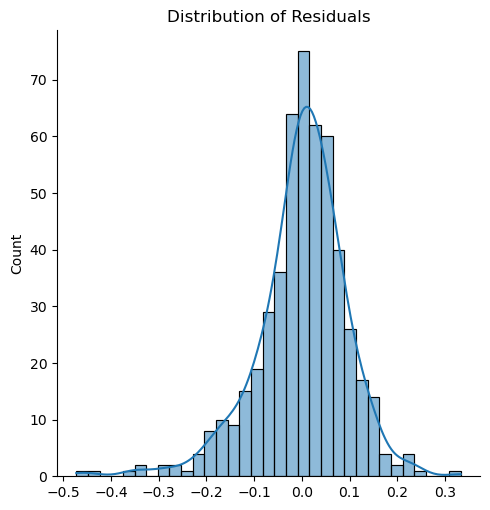

In [307]:
res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.title('Distribution of Residuals')
plt.show()

### Plotting a QQ Plot for Train Dataset

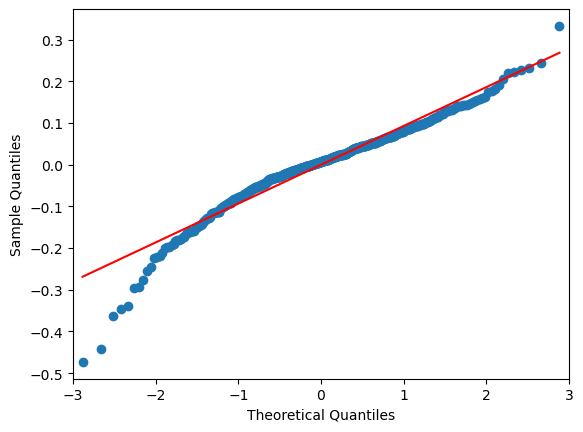

In [308]:
from statsmodels.api import qqplot

sm.qqplot(res, line='r')
plt.show()

## Predict model on Test Dataset


In [309]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [310]:
y_test=df_test.pop('cnt')
X_test=df_test

In [311]:
cols_test=X_train_rfe.columns

In [312]:
X_test_sm=X_test[cols_test]
X_test_sm= sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,atemp,season_spring,season_summer,season_winter,mnth_Mar,weekday_sat,weathersit_drizzle,weathersit_mist,temp,mnth_Oct,workingday
175,1.0,0,0.740646,0,0,0,0,1,0,0,0.804861,0,0
306,1.0,0,0.429037,0,0,1,0,0,0,0,0.442008,0,1
631,1.0,1,0.555827,0,0,1,0,0,0,0,0.575969,0,1
107,1.0,0,0.556658,0,1,0,0,0,0,0,0.573859,0,1
339,1.0,0,0.495297,0,0,1,0,0,1,0,0.510571,0,1


In [313]:
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

175    0.567918
306    0.446643
631    0.743429
107    0.481366
339    0.166500
         ...   
327    0.384648
569    0.831656
596    0.687309
323    0.360562
336    0.403069
Length: 220, dtype: float64

### QQ Plot for Test Dataset

In [314]:
res_test= y_test-y_test_pred

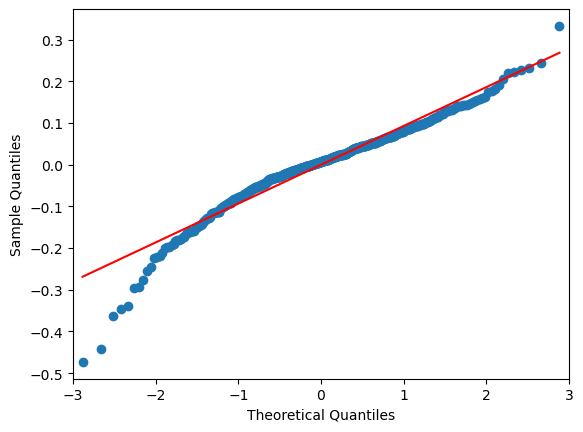

In [315]:
sm.qqplot(res, line='r')
plt.show()

### Calculating R2 Score of the model

In [316]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7882486139267416

### R2 score of Test Dataset is 0.800 and R2 Score of Train Dataset is 0.817 which shows that the model is pretty accurate

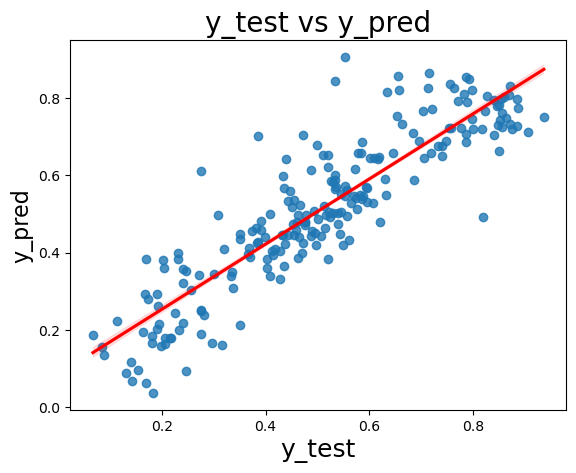

In [317]:
# Visualizing the best fit line 
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
# Plot heading 
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                        
plt.show()

### Equation of our best-fit line is:

### Count = 0.2144 + 0.2407 * Year - 0.1553 * Season_Spring + 0.0563 * Saturday - 0.3200 * Weathersit_Drizzle - 0.0757 * Weathersit_Mist + 0.3821 * Temperature + 0.0697 * October + 0.0449 * Workingday